Import the required libraries.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Read and open the datasets.

In [2]:
data_rides = pd.read_csv('datasets/project_sql_result_01.csv')
data_neigh = pd.read_csv('datasets/project_sql_result_04.csv')

In [3]:
data_rides.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [20]:
data_neigh.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [23]:
data_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


Check for duplicated rows in the data.

In [7]:
data_rides.duplicated().sum()

0

In [8]:
data_neigh.duplicated().sum()

0

Convert data types.

I will convert the average trips to integer type because trips should be whole numbers. I will round up the average trips to the nearest whole number.

I will define a function that rounds up any extra decimal, by using the math.ceil() function.

In [18]:
def rounder(average):
    extra_rounded = math.ceil(average)
    return extra_rounded

In [19]:
data_neigh['average_trips'] = data_neigh['average_trips'].apply(rounder)

In [21]:
data_neigh.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [22]:
data_neigh['average_trips'] = data_neigh['average_trips'].astype(np.int64)

### Data Analysis

- Identify the top 10 neighborhoods in terms of drop-offs.

In [26]:
top10_neigh = data_neigh.sort_values(by='average_trips', ascending=False).head(10)

In [27]:
top10_neigh

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


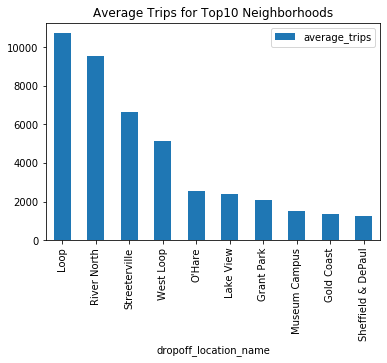

In [42]:
top10_neigh.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Average Trips for Top10 Neighborhoods');

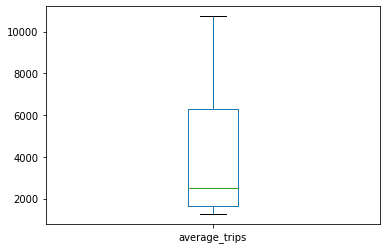

In [44]:
top10_neigh.plot(kind='box');

In [45]:
top10_neigh['average_trips'].describe()

count       10.000000
mean      4325.300000
std       3530.244186
min       1260.000000
25%       1649.750000
50%       2484.000000
75%       6289.750000
max      10728.000000
Name: average_trips, dtype: float64

In [38]:
top10_company = data_rides.sort_values('trips_amount', ascending=False).head(10)

In [39]:
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


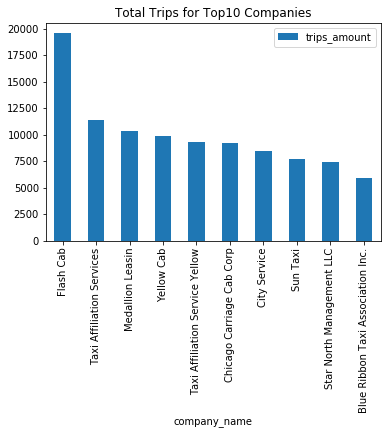

In [41]:
top10_company.plot(kind='bar', x='company_name', y='trips_amount', title='Total Trips for Top10 Companies');

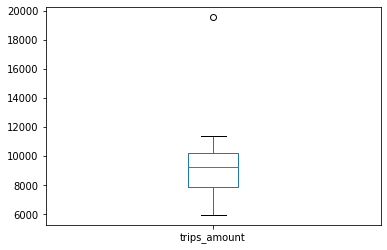

In [46]:
top10_company.plot(kind='box');

In [47]:
top10_company.describe()

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000
